In [10]:
# --------------------------------------------
# 
# Compare batch processed runs, high vs low
# fertilizer application rates... (note, takes
# files that were generated in the scratch/cdr_
# ...cc-sil_compare-apprate+psize.ipynb file)
# 
# --------------------------------------------
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib.colors import TwoSlopeNorm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # for custom legend entries (needed for contour plot)
import cmocean.cm as cmo
import pickle
import os
import re
import glob
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# set data path
datpath = "/home/tykukla/aglime-swap-cdr/scepter/process/runs/batch_postprocResults/cc-sil_psize_apprate"

# --- select which data to read in 
# FERT LEVEL 1 
fertLevel_1 = "hi"
idx_1 = "001"
tag_sil_on_1, tag_sil_1 = False, "wet"

# FERT LEVEL 2
fertLevel_2 = "low"
idx_2 = "003"
tag_sil_on_2, tag_sil_2 = False, "wet"

In [11]:
# ---- READ IN DATA
# FERT LEVEL 1 
if tag_sil_on_1:
    datdir_1 = f"meanAnn_shortRun_{fertLevel_1}Fert_{tag_sil_1}_{idx_1}"    
else:
    datdir_1 = f"meanAnn_shortRun_{fertLevel_1}Fert_{idx_1}"
datloc_1 = os.path.join(datpath, datdir_1)
# read in dataframes
with open(os.path.join(datloc_1, 'dataframes.pkl'), 'rb') as f:
    loaded_dfs = pickle.load(f)
df_sil1 = loaded_dfs['df_sil']
dfsil_sum1 = loaded_dfs['dfsil_sum']
df_cc1 = loaded_dfs['df_cc']
dfcc_sum1 = loaded_dfs['dfcc_sum']
# read in xr datasets
ds1 = xr.open_dataset(os.path.join(datloc_1, 'ds.nc'))
ds_anom1 = xr.open_dataset(os.path.join(datloc_1, 'ds_anom.nc'))

# FERT LEVEL 2
if tag_sil_on_2:
    datdir_2 = f"meanAnn_shortRun_{fertLevel_2}Fert_{tag_sil_2}_{idx_2}"    
else:
    datdir_2 = f"meanAnn_shortRun_{fertLevel_2}Fert_{idx_2}"
datloc_2 = os.path.join(datpath, datdir_2)
# read in dataframes
with open(os.path.join(datloc_2, 'dataframes.pkl'), 'rb') as f:
    loaded_dfs = pickle.load(f)
df_sil2 = loaded_dfs['df_sil']
dfsil_sum2 = loaded_dfs['dfsil_sum']
df_cc2 = loaded_dfs['df_cc']
dfcc_sum2 = loaded_dfs['dfcc_sum']
# read in xr datasets
ds2 = xr.open_dataset(os.path.join(datloc_2, 'ds.nc'))
ds_anom2 = xr.open_dataset(os.path.join(datloc_2, 'ds_anom.nc'))

In [12]:
# --- READ IN COMPILED DATA
datpath_comp = "/home/tykukla/aglime-swap-cdr/scepter/process/data_external"
comp_fn = "kukla-erw_fluxes.csv"
# read in 
df_compile = pd.read_csv(os.path.join(datpath_comp, comp_fn))

In [13]:
dfsil_sum1

,dustrate_ton_ha_yr,dustrad,cdr,timehorizon_yr,cdvar,dustsp,E_transport_tonCO2_tonRock,E_crush_tonCO2_tonRock,E_total_tonCO2_tonRock,E_transport_tonCO2_ha_yr,...,E_total_tonCO2_ha_yr,E_transport_tonCO2_ha,E_crush_tonCO2_ha,E_total_tonCO2_ha,truck_km,barge_km,barge_diesel_km,p80_input,Efactor_org,bondwork_index
0,0.3,1,-0.011203,15,cdr_dif,gbas,0.00282,0.12162,0.12444,0.000846,...,0.037332,0.01269,0.547288,0.559978,0.0,100.0,0,1300.0,MRO,18.67
1,0.3,10,-0.010891,15,cdr_dif,gbas,0.00282,0.036087,0.038907,0.000846,...,0.011672,0.01269,0.162393,0.175083,0.0,100.0,0,1300.0,MRO,18.67
2,0.3,30,-0.011847,15,cdr_dif,gbas,0.00282,0.019369,0.022189,0.000846,...,0.006657,0.01269,0.087159,0.099849,0.0,100.0,0,1300.0,MRO,18.67
3,0.3,50,-0.010400,15,cdr_dif,gbas,0.00282,0.014221,0.017041,0.000846,...,0.005112,0.01269,0.063994,0.076684,0.0,100.0,0,1300.0,MRO,18.67
4,0.3,75,-0.011643,15,cdr_dif,gbas,0.00282,0.010975,0.013795,0.000846,...,0.004138,0.01269,0.049386,0.062076,0.0,100.0,0,1300.0,MRO,18.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,100.0,75,42.453948,15,cdr_dif,gbas,0.00282,0.010975,0.013795,0.282,...,1.379469,4.23,16.462033,20.692033,0.0,100.0,0,1300.0,MRO,18.67
113,100.0,100,33.709902,15,cdr_dif,gbas,0.00282,0.00904,0.01186,0.282,...,1.185956,4.23,13.559333,17.789333,0.0,100.0,0,1300.0,MRO,18.67
114,100.0,125,27.926875,15,cdr_dif,gbas,0.00282,0.007719,0.010539,0.282,...,1.053896,4.23,11.578433,15.808433,0.0,100.0,0,1300.0,MRO,18.67
115,100.0,150,23.827553,15,cdr_dif,gbas,0.00282,0.006744,0.009564,0.282,...,0.956413,4.23,10.116194,14.346194,0.0,100.0,0,1300.0,MRO,18.67


KeyError: 'dustrate_ton_ha_yr'

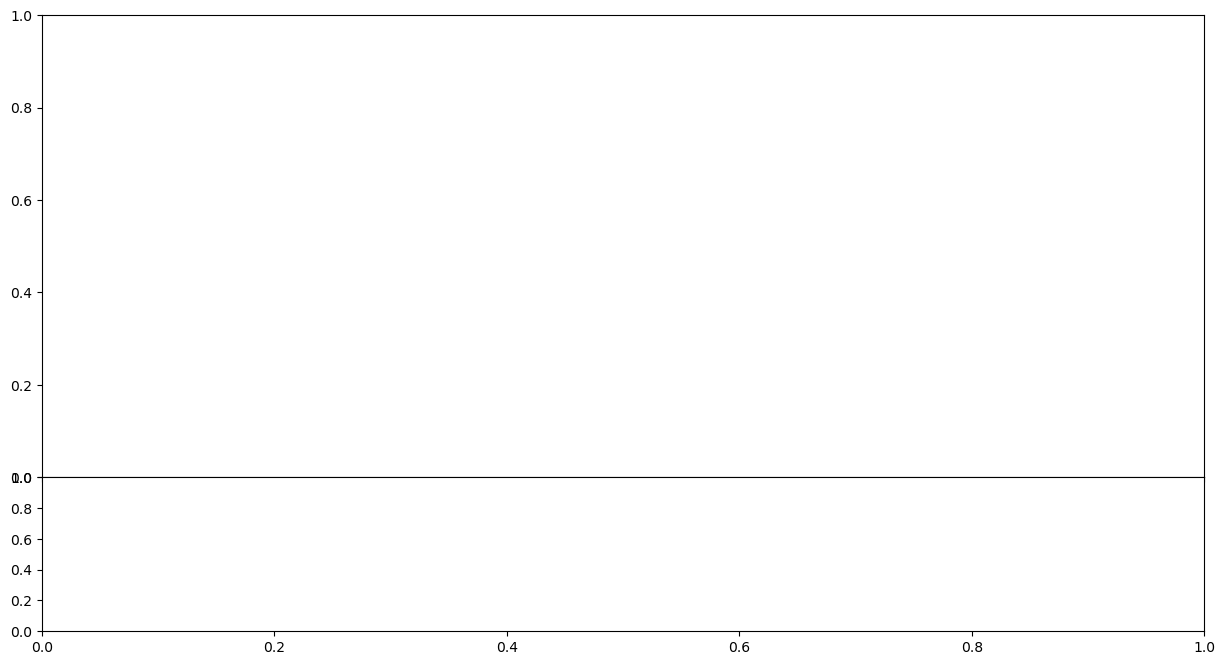

In [14]:
# --- PLOT 1: removal vs application flux for both fert levels
# select dust radius and loss percent
dustrad_tmp = 150  # [micron]
# color palette
col = cmo.curl_r(np.linspace(0.2, 1.5, 3))   # for line plot
barcol = 'darkgray'
# set fontsizes
fs_xlab = 25     # x title
fs_ylab = 25     # y title
fs_tick = 20     # ticks, bot haxes
fs_title = 23    # plot title
fs_leg = 20      # legend text
# linewidth
lwds = 7

# set plot limits
xmin, xmax = 0, 50
ymin1, ymax1 = 0, 15
ymin2, ymax2 = 0, 40
# hist 
nbars = 15


# pull out the data to plot
dfsil_tmp1 = dfsil_sum1[dfsil_sum1['dustrad'] == dustrad_tmp]
dfcc_tmp1 = dfcc_sum1[dfcc_sum1['dustrad'] == dustrad_tmp]
dfsil_tmp2 = dfsil_sum2[dfsil_sum2['dustrad'] == dustrad_tmp]
dfcc_tmp2 = dfcc_sum2[dfcc_sum2['dustrad'] == dustrad_tmp]


# make the title text
timehorizon = dfsil_sum1['timehorizon_yr'].values[0]
ptext1 = f"Time horizon: {timehorizon} yrs\nDust diameter: " + str(dustrad_tmp) + " microns"

# --- SET UP PLOT
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(15, 8))
# adjust space between top and bottom panels
plt.subplots_adjust(hspace=0.)

# CDR vs apprate
# --- fertlevel2
ax1.plot(dfcc_tmp2['dustrate_ton_ha_yr'], dfcc_tmp2['cdr'], label=f'{fertLevel_2}Fert aglime', c=col[0], 
         linewidth=lwds, linestyle='--')
ax1.plot(dfsil_tmp2['dustrate_ton_ha_yr'], dfsil_tmp2['cdr'], label=f'{fertLevel_2}Fert basalt', c=col[1], 
         linewidth=lwds, linestyle='--')
# --- fertlevel1
ax1.plot(dfcc_tmp1['dustrate_ton_ha_yr'], dfcc_tmp1['cdr'], label=f'{fertLevel_1}Fert aglime', c=col[0], linewidth=lwds)
ax1.plot(dfsil_tmp1['dustrate_ton_ha_yr'], dfsil_tmp1['cdr'], label=f'{fertLevel_1}Fert basalt', c=col[1], linewidth=lwds)
# axes and legend
ax1.set_ylabel(r"$R\ (\text{tons}\ \text{ha}^{-1})$", fontsize=fs_ylab)
ax1.tick_params(axis='both', labelsize=fs_tick)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin1, ymax1)
ax1.set_title(ptext1, fontsize=fs_title)
ax1.legend(fontsize=fs_leg, loc='lower right')
# histogram
ax2.hist(df_compile['application_rate_ton_ha_yr'], bins=nbars, range=(xmin,xmax), color=barcol)
ax2.set_xlabel(r"Application flux $(\text{tons}\ \text{ha}^{-1}\ \text{yr}^{-1})$", fontsize=fs_xlab)
ax2.tick_params(axis='both', labelsize=fs_tick)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymax2,ymin2)

(40.0, 0.0)

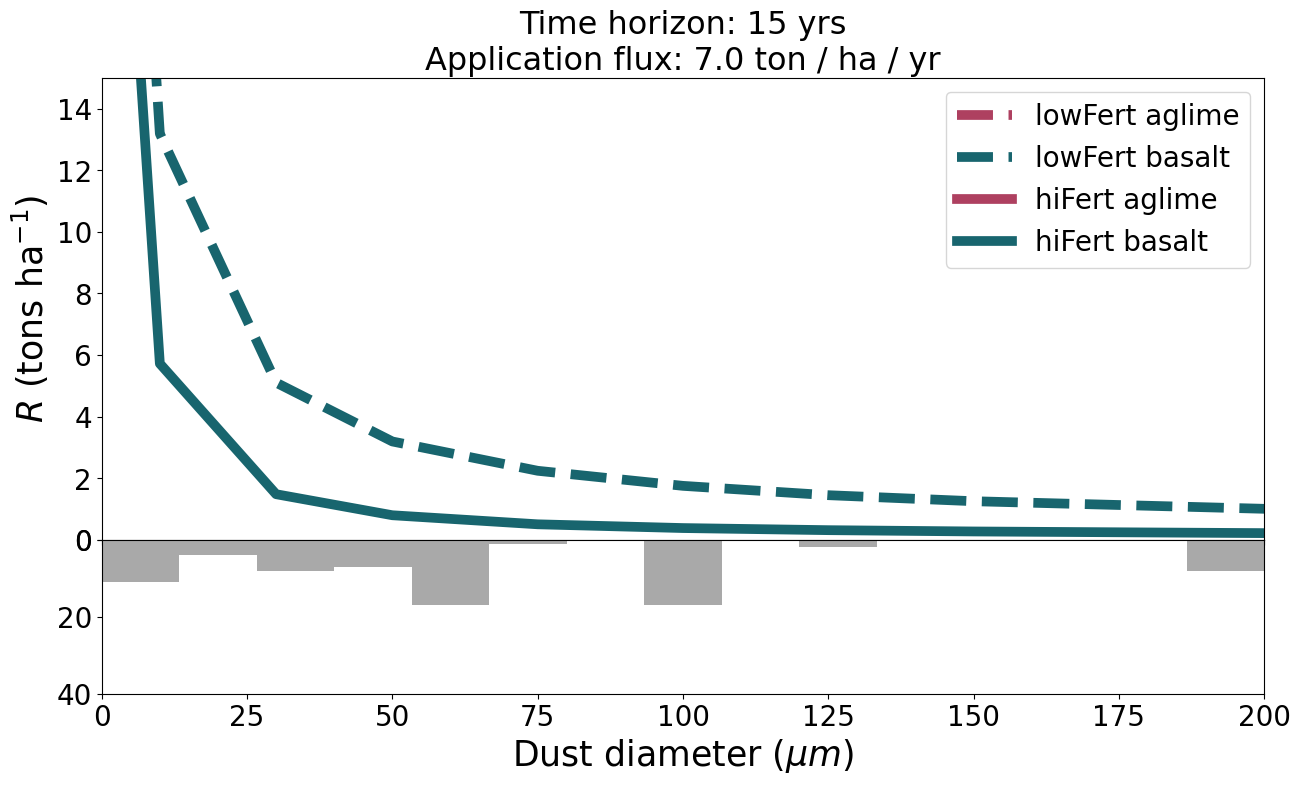

In [ ]:
# --- PLOT 2: removal vs particle size flux for both fert levels
# select dust radius and loss percent
apprate_tmp = 7.  # [ton/ha/yr]
# color palette
col = cmo.curl_r(np.linspace(0.2, 1.5, 3))   # for line plot
barcol = 'darkgray'
# set fontsizes
fs_xlab = 25     # x title
fs_ylab = 25     # y title
fs_tick = 20     # ticks, bot haxes
fs_title = 23    # plot title
fs_leg = 20      # legend text
# linewidth
lwds = 7

# set plot limits
xmin, xmax = 0, 200
ymin1, ymax1 = 0, 15
ymin2, ymax2 = 0, 40
# hist 
nbars = 15


# pull out the data to plot
dfsil_tmp1 = dfsil_sum1[dfsil_sum1['dustrate_ton_ha_yr'] == apprate_tmp]
dfcc_tmp1 = dfcc_sum1[dfcc_sum1['dustrate_ton_ha_yr'] == apprate_tmp]
dfsil_tmp2 = dfsil_sum2[dfsil_sum2['dustrate_ton_ha_yr'] == apprate_tmp]
dfcc_tmp2 = dfcc_sum2[dfcc_sum2['dustrate_ton_ha_yr'] == apprate_tmp]


# make the title text
ptext1 = f"Time horizon: {timehorizon} yrs\nApplication flux: " + str(apprate_tmp) + " ton / ha / yr"

# --- SET UP PLOT
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(15, 8))
# adjust space between top and bottom panels
plt.subplots_adjust(hspace=0.)

# CDR vs apprate
# --- fertlevel2
ax1.plot(dfcc_tmp2['dustrad'], dfcc_tmp2['cdr'], label=f'{fertLevel_2}Fert aglime', c=col[0], 
         linewidth=lwds, linestyle='--')
ax1.plot(dfsil_tmp2['dustrad'], dfsil_tmp2['cdr'], label=f'{fertLevel_2}Fert basalt', c=col[1], 
         linewidth=lwds, linestyle='--')
# --- fertlevel1
ax1.plot(dfcc_tmp1['dustrad'], dfcc_tmp1['cdr'], label=f'{fertLevel_1}Fert aglime', c=col[0], linewidth=lwds)
ax1.plot(dfsil_tmp1['dustrad'], dfsil_tmp1['cdr'], label=f'{fertLevel_1}Fert basalt', c=col[1], linewidth=lwds)
# axes and legend
ax1.set_ylabel(r"$R\ (\text{tons}\ \text{ha}^{-1})$", fontsize=fs_ylab)
ax1.tick_params(axis='both', labelsize=fs_tick)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin1, ymax1)
ax1.set_title(ptext1, fontsize=fs_title)
ax1.legend(fontsize=fs_leg, loc='upper right')
# histogram
ax2.hist(df_compile['particle_diameter_um'], bins=nbars, range=(xmin,xmax), color=barcol)
ax2.set_xlabel(r"Dust diameter $(\mu m)$", fontsize=fs_xlab)
ax2.tick_params(axis='both', labelsize=fs_tick)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymax2,ymin2)

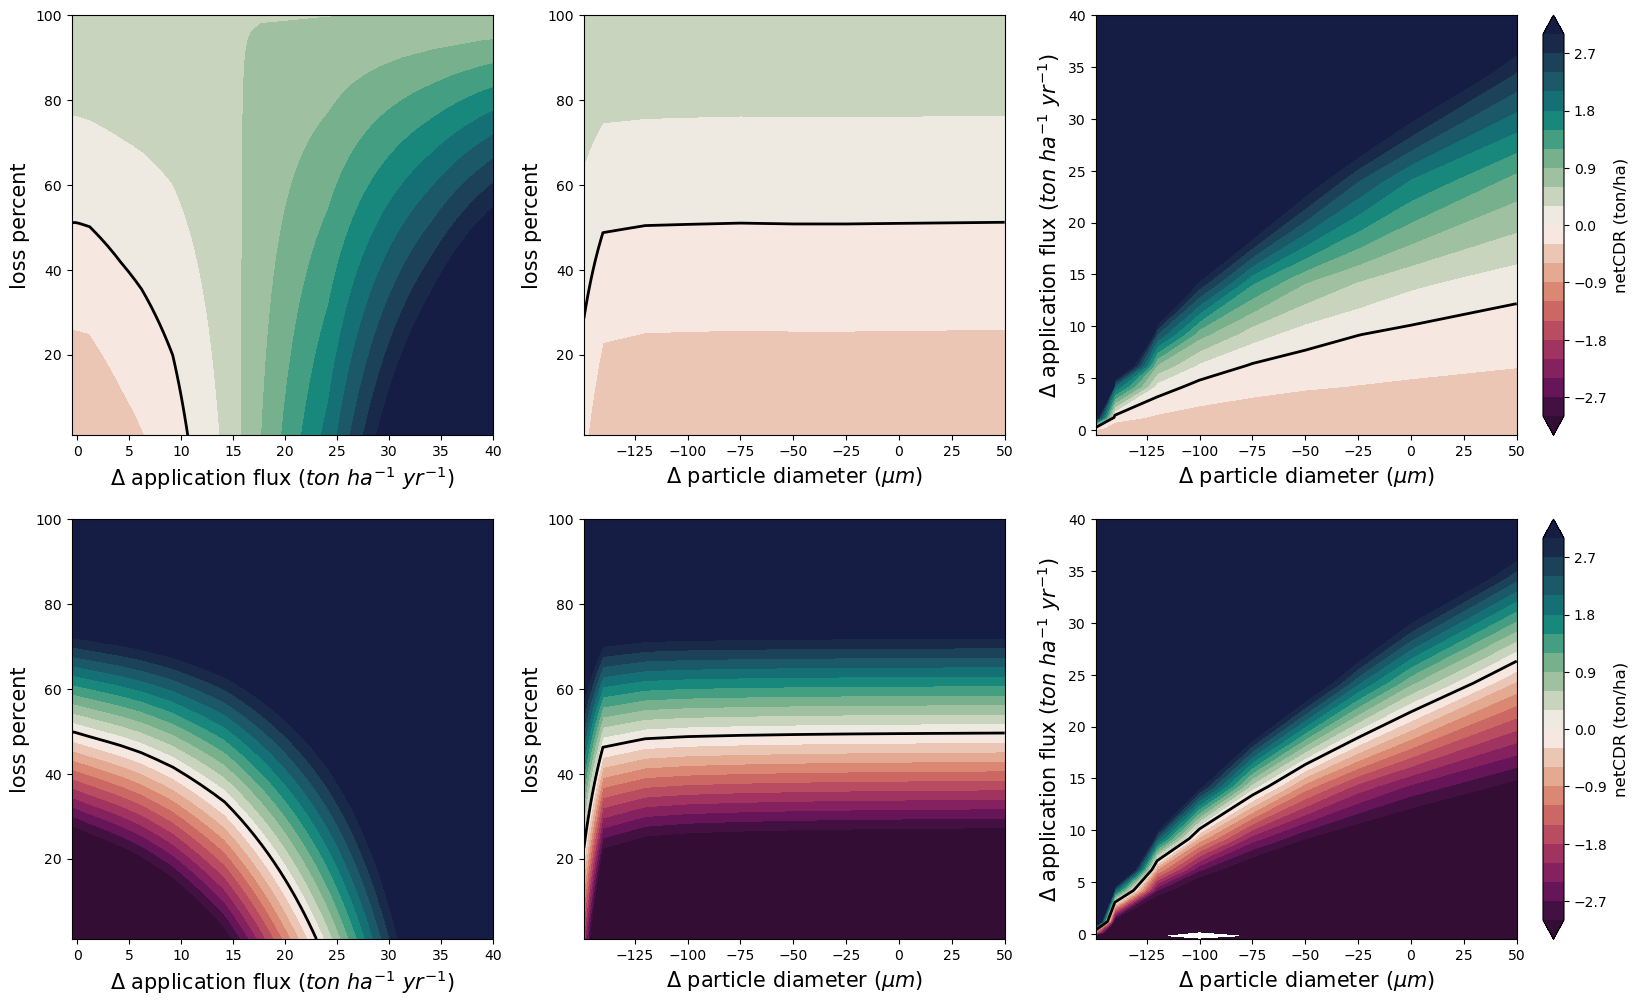

In [15]:
# --- PLOT 3: contour plots, apprate, dustrad, both; both fert levels

# select variable to plot in contour
pvar = "net_R"
# color palette
col = cmo.curl_r
# set static values
static_dustrad = 0.     # method=nearest used for finding the value to fix
static_apprate = 0   # method=nearest used for finding the value to fix
static_losspercent = 9. # percent loss constant (for right column)
# set fontsizes
fs_xlab = 15     # x title
fs_ylab = 15     # y title
fs_tick = 10     # ticks, bot haxes
fs_title = 13    # plot title
fs_cbarlab = 12  # colorbar title
fs_cbartick = 10 # colorbar ticks
# color limits
cmin, cmax = -3, 3
# x-axis limits
# set x and y arrs
# fert level 1
y1 = ds1['loss_percent'].values
x1a = ds_anom1['D_apprate'].values
x1b = ds_anom1['D_dustrad'].values
x1amin, x1amax = min(x1a), 40
x1bmin, x1bmax = min(x1b), max(x1b)
# fert level 2
y2 = ds2['loss_percent'].values
x2a = ds_anom2['D_apprate'].values
x2b = ds_anom2['D_dustrad'].values
x2amin, x2amax = min(x2a), 40
x2bmin, x2bmax = min(x2b), max(x2b)

# how to handle the colorbar
cbar_extend = "both"    # both, max, or min

# set time horizon
time_horizon = ds_anom1.timehorizon_yr.values
cc_app_fixed = ds_anom1.cc_apprate_fixed.values
cc_dust_fixed = ds_anom1.cc_dustrad_fixed.values

# set plot title text
sildust = static_dustrad + cc_dust_fixed
# silapp1 = ds_anom1.sel(D_apprate = static_apprate, method='nearest').D_apprate.values + cc_app_fixed
# silapp2 = ds_anom2.sel(D_apprate = static_apprate, method='nearest').D_apprate.values + cc_app_fixed
# p1text = str(time_horizon) + '-yr integrated CDR;\n ' + "cc: " + str(cc_app_fixed) + " ton/ha/yr; " + str(cc_dust_fixed) + " microns\n " + "sil: " + str(sildust) + " microns"
# p2text = str(time_horizon) + '-yr integrated CDR;\n ' + "cc: " + str(cc_app_fixed) + " ton/ha/yr; " + str(cc_dust_fixed) + " microns\n " + "sil: " + str(silapp) + " ton/ha/yr"





# Define the midpoint normalization
# norm = TwoSlopeNorm(vmin=ds_anom[pvar].min(), vmax=ds_anom[pvar].max(), vcenter=0)
norm = TwoSlopeNorm(vmin=cmin, vmax=cmax,vcenter=0)

# set up grid 
spec = GridSpec(ncols=3, nrows=2, hspace=0.2, width_ratios=[0.8, 0.8, 1])
plt.figure(figsize=(20,12))

# ----------- FERT LEVEL 1 --------------------------------------------------------------------------
# PLOT 1
ax = plt.subplot(spec[0])
contour = plt.contourf(x1a,y1,ds_anom1.sel(D_dustrad = static_dustrad, method='nearest')[pvar], 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, norm=norm, vmin=cmin, vmax=cmax, extend=cbar_extend)
# add zero contour line
contour_line = plt.contour(x1a, y1, ds_anom1.sel(D_dustrad = static_dustrad, method='nearest')[pvar], 
                            levels=[0], colors='black', linewidths=2)
# cbar = plt.colorbar(contour)
# cbar.set_label('netCDR (ton/ha)', fontsize=fs_cbarlab)
# cbar.ax.tick_params(labelsize=fs_cbartick)
# plt.title(p1text, fontsize=fs_title)
plt.xlabel(r"$\Delta$ application flux $(ton\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.ylabel("loss percent", fontsize=fs_ylab)
plt.tick_params(axis='both', labelsize=fs_tick)
# plt.xscale('log')
plt.xlim(x1amin, x1amax)

# PLOT 2
ax = plt.subplot(spec[1])
contour = plt.contourf(x1b,y1,ds_anom1.sel(D_apprate = static_apprate, method='nearest')[pvar], 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, norm=norm, vmin=cmin, vmax=cmax, extend=cbar_extend)
# add zero contour line
contour_line = plt.contour(x1b, y1,ds_anom1.sel(D_apprate = static_apprate, method='nearest')[pvar],
                            levels=[0], colors='black', linewidths=2)
# cbar = plt.colorbar(contour)
# cbar.set_label('netCDR (ton/ha)', fontsize=fs_cbarlab)
# cbar.ax.tick_params(labelsize=fs_cbartick)
# plt.title(p2text, fontsize=fs_title)
plt.xlabel(r"$\Delta$ particle diameter $(\mu m)$", fontsize=fs_xlab)
plt.tick_params(axis='both', labelsize=fs_tick)
plt.xlim(x1bmin, x1bmax)
plt.ylabel("loss percent", fontsize=fs_ylab)

# PLOT 3
ax = plt.subplot(spec[2])
contour = plt.contourf(x1b,x1a,ds_anom1.sel(loss_percent = static_losspercent, method='nearest')[pvar], 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, norm=norm, vmin=cmin, vmax=cmax, extend=cbar_extend)
# add zero contour line
contour_line = plt.contour(x1b,x1a,ds_anom1.sel(loss_percent = static_losspercent, method='nearest')[pvar],levels=[0], colors='black', linewidths=2)
cbar = plt.colorbar(contour)
cbar.set_label('netCDR (ton/ha)', fontsize=fs_cbarlab)
cbar.ax.tick_params(labelsize=fs_cbartick)
plt.ylabel(r"$\Delta$ application flux $(ton\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.xlabel(r"$\Delta$ particle diameter $(\mu m)$", fontsize=fs_ylab)
plt.tick_params(axis='both', labelsize=fs_tick)
# plt.xscale('log')
plt.xlim(x1bmin, x1bmax)
plt.ylim(x1amin, x1amax)


# ----------- FERT LEVEL 2 --------------------------------------------------------------------------
# PLOT 1
ax = plt.subplot(spec[3])
contour = plt.contourf(x2a,y2,ds_anom2.sel(D_dustrad = static_dustrad, method='nearest')[pvar], 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, norm=norm, vmin=cmin, vmax=cmax, extend=cbar_extend)
# add zero contour line
contour_line = plt.contour(x2a, y2, ds_anom2.sel(D_dustrad = static_dustrad, method='nearest')[pvar], 
                            levels=[0], colors='black', linewidths=2)
# cbar = plt.colorbar(contour)
# cbar.set_label('netCDR (ton/ha)', fontsize=fs_cbarlab)
# cbar.ax.tick_params(labelsize=fs_cbartick)
# plt.title(p1text, fontsize=fs_title)
plt.xlabel(r"$\Delta$ application flux $(ton\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.ylabel("loss percent", fontsize=fs_ylab)
plt.tick_params(axis='both', labelsize=fs_tick)
# plt.xscale('log')
plt.xlim(x2amin, x2amax)

# PLOT 2
ax = plt.subplot(spec[4])
contour = plt.contourf(x2b,y2,ds_anom2.sel(D_apprate = static_apprate, method='nearest')[pvar], 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, norm=norm, vmin=cmin, vmax=cmax, extend=cbar_extend)
# add zero contour line
contour_line = plt.contour(x2b, y2,ds_anom2.sel(D_apprate = static_apprate, method='nearest')[pvar],
                            levels=[0], colors='black', linewidths=2)
# cbar = plt.colorbar(contour)
# cbar.set_label('netCDR (ton/ha)', fontsize=fs_cbarlab)
# cbar.ax.tick_params(labelsize=fs_cbartick)
# plt.title(p2text, fontsize=fs_title)
plt.xlabel(r"$\Delta$ particle diameter $(\mu m)$", fontsize=fs_xlab)
plt.tick_params(axis='both', labelsize=fs_tick)
plt.xlim(x2bmin, x2bmax)
plt.ylabel("loss percent", fontsize=fs_ylab)

# PLOT 3
ax = plt.subplot(spec[5])
contour = plt.contourf(x2b,x2a,ds_anom2.sel(loss_percent = static_losspercent, method='nearest')[pvar], 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, norm=norm, vmin=cmin, vmax=cmax, extend=cbar_extend)
# add zero contour line
contour_line = plt.contour(x2b,x2a,ds_anom2.sel(loss_percent = static_losspercent, method='nearest')[pvar],levels=[0], colors='black', linewidths=2)
cbar = plt.colorbar(contour)
cbar.set_label('netCDR (ton/ha)', fontsize=fs_cbarlab)
cbar.ax.tick_params(labelsize=fs_cbartick)
plt.ylabel(r"$\Delta$ application flux $(ton\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.xlabel(r"$\Delta$ particle diameter $(\mu m)$", fontsize=fs_ylab)
plt.tick_params(axis='both', labelsize=fs_tick)
# plt.xscale('log')
plt.xlim(x2bmin, x2bmax)
plt.ylim(x2amin, x2amax)


plt.show();

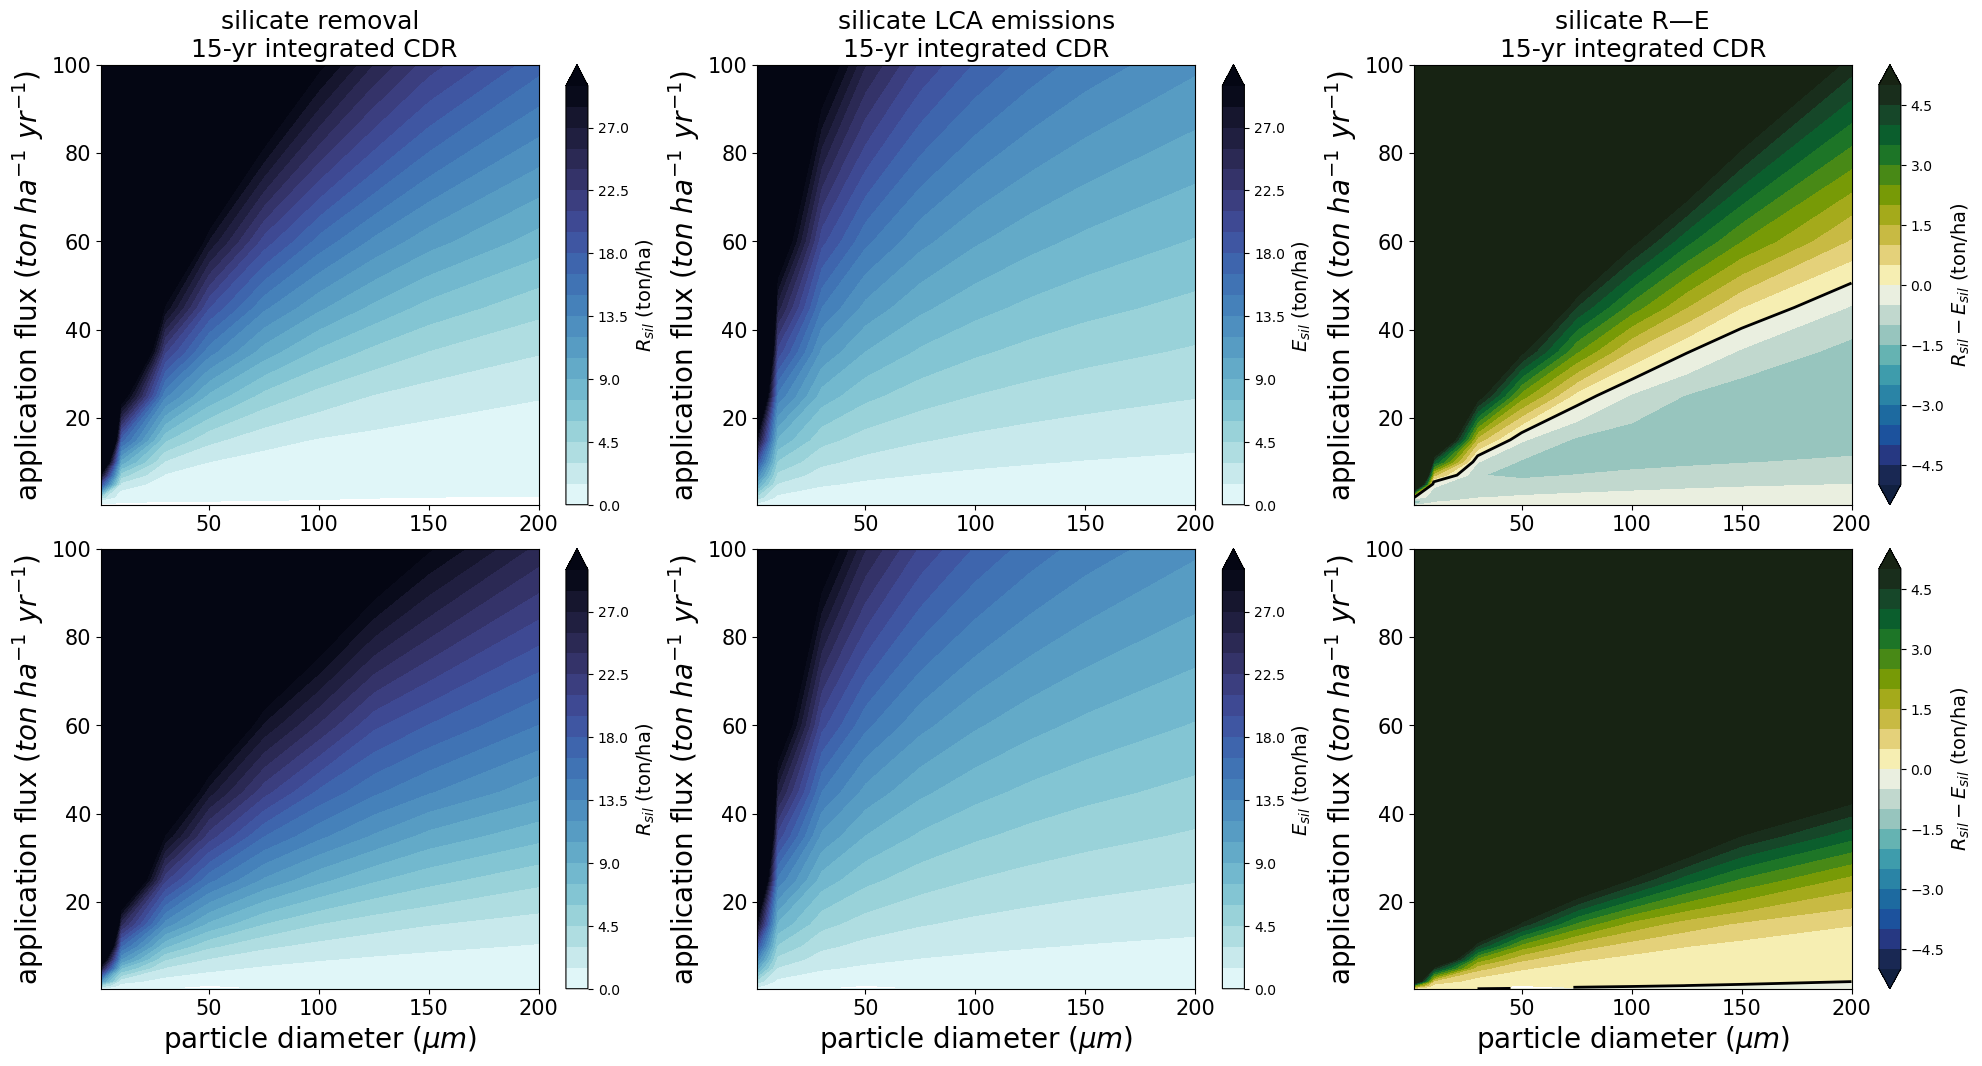

In [16]:
# --- PLOT decompose the silicate R and E 
# select variable to plot in contour
pvar1 = "sil_R"
pvar2 = "sil_E"
pvar3 = "sil_R_E"
# color palette
col12 = cmo.ice_r
col3 = cmo.delta
# set static values
static_losspercent = 10 # method=nearest usef for finding the value to fix
# set fontsizes
fs_xlab = 20     # x title
fs_ylab = 20     # y title
fs_tick = 15     # ticks, bot haxes
fs_title = 18    # plot title
fs_cbarlab = 14  # colorbar title
fs_cbartick = 10 # colorbar ticks
# color limits
cmin12, cmax12 = 0, 30
cmin3, cmax3 = -5, 5
# axis limits
# set x and y arrs
# pull out the dataset to plot
loss_percent_plotted = ds1.sel(loss_percent=static_losspercent, method='nearest').loss_percent.values
dsp1 = ds1.sel(loss_percent=static_losspercent, method='nearest')
x1 = dsp1['dustrad'].values
y1 = dsp1['apprate'].values
y1min, y1max = min(y1), 70
x1min, x1max = min(x1), max(x1)

dsp2 = ds2.sel(loss_percent=static_losspercent, method='nearest')
x2 = dsp2['dustrad'].values
y2 = dsp2['apprate'].values
y2min, y2max = min(y2), 70
x2min, x2max = min(x2), max(x2)

# set time horizon
time_horizon = ds1.timehorizon_yr.values

# how to handle the colorbar for plot 3
cbar_extend = "both"    # both, max, or min

# set plot title 
ptext1 = "silicate removal\n " + str(time_horizon) + '-yr integrated CDR'
ptext2 = "silicate LCA emissions\n" + str(time_horizon) + '-yr integrated CDR'
ptext3 = "silicate R—E\n" + str(time_horizon) + '-yr integrated CDR'

# Define the midpoint normalization for diverging bar
norm = TwoSlopeNorm(vmin=cmin3, vmax=cmax3,vcenter=0)




# set up grid 
spec = GridSpec(ncols=3, nrows=2, hspace=0.1)
plt.figure(figsize=(24,12))


# -------- FERT LEVEL 1 -----------------------------------------------------------
# --- PLOT 1
ax = plt.subplot(spec[0])
contour = plt.contourf(x1,y1,dsp1[pvar1], levels=np.linspace(cmin12, cmax12, 21), cmap = col12, vmin=cmin12, vmax=cmax12, extend="max")
cbar = plt.colorbar(contour)
cbar.set_label(r'$R_{sil}$ (ton/ha)', fontsize=fs_cbarlab)
cbar.ax.tick_params(labelsize=fs_cbartick)
plt.title(ptext1, fontsize=fs_title)
plt.ylabel(r"application flux $(ton\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.xlabel(r"", fontsize=fs_ylab)
plt.tick_params(axis='both', labelsize=fs_tick)
# plt.xscale('log')
plt.xlim(x1min, x1max)

# --- PLOT 2
ax = plt.subplot(spec[1])
contour = plt.contourf(x1,y1,dsp1[pvar2], levels=np.linspace(cmin12, cmax12, 21), cmap = col12, vmin=cmin12, vmax=cmax12, extend="max")
cbar = plt.colorbar(contour)
cbar.set_label(r'$E_{sil}$ (ton/ha)', fontsize=fs_cbarlab)
cbar.ax.tick_params(labelsize=fs_cbartick)
plt.title(ptext2, fontsize=fs_title)
plt.ylabel(r"application flux $(ton\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.xlabel(r"", fontsize=fs_ylab)
plt.tick_params(axis='both', labelsize=fs_tick)
# plt.xscale('log')
plt.xlim(x1min, x1max)

# --- PLOT 3
ax = plt.subplot(spec[2])
contour = plt.contourf(x1,y1,dsp1[pvar3], levels=np.linspace(cmin3, cmax3, 21), cmap = col3, vmin=cmin3, vmax=cmax3, extend=cbar_extend)
contour_line = plt.contour(x1,y1,dsp1[pvar3],levels=[0], colors='black', linewidths=2)
cbar = plt.colorbar(contour)
cbar.set_label(r'$R_{sil}-E_{sil}$ (ton/ha)', fontsize=fs_cbarlab)
cbar.ax.tick_params(labelsize=fs_cbartick)
plt.title(ptext3, fontsize=fs_title)
plt.ylabel(r"application flux $(ton\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.xlabel(r"", fontsize=fs_ylab)
plt.tick_params(axis='both', labelsize=fs_tick)
# plt.xscale('log')
plt.xlim(x1min, x1max)




# -------- FERT LEVEL 2 -----------------------------------------------------------
# --- PLOT 1
ax = plt.subplot(spec[3])
contour = plt.contourf(x2,y2,dsp2[pvar1], levels=np.linspace(cmin12, cmax12, 21), cmap = col12, vmin=cmin12, vmax=cmax12, extend="max")
cbar = plt.colorbar(contour)
cbar.set_label(r'$R_{sil}$ (ton/ha)', fontsize=fs_cbarlab)
cbar.ax.tick_params(labelsize=fs_cbartick)
# plt.title(ptext1, fontsize=fs_title)
plt.ylabel(r"application flux $(ton\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.xlabel(r"particle diameter $(\mu m)$", fontsize=fs_ylab)
plt.tick_params(axis='both', labelsize=fs_tick)
# plt.xscale('log')
plt.xlim(x2min, x2max)

# --- PLOT 2
ax = plt.subplot(spec[4])
contour = plt.contourf(x2,y2,dsp2[pvar2], levels=np.linspace(cmin12, cmax12, 21), cmap = col12, vmin=cmin12, vmax=cmax12, extend="max")
cbar = plt.colorbar(contour)
cbar.set_label(r'$E_{sil}$ (ton/ha)', fontsize=fs_cbarlab)
cbar.ax.tick_params(labelsize=fs_cbartick)
# plt.title(ptext2, fontsize=fs_title)
plt.ylabel(r"application flux $(ton\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.xlabel(r"particle diameter $(\mu m)$", fontsize=fs_ylab)
plt.tick_params(axis='both', labelsize=fs_tick)
# plt.xscale('log')
plt.xlim(x2min, x2max)

# --- PLOT 3
ax = plt.subplot(spec[5])
contour = plt.contourf(x2,y2,dsp2[pvar3], levels=np.linspace(cmin3, cmax3, 21), cmap = col3, vmin=cmin3, vmax=cmax3, extend=cbar_extend)
contour_line = plt.contour(x2,y2,dsp2[pvar3],levels=[0], colors='black', linewidths=2)
cbar = plt.colorbar(contour)
cbar.set_label(r'$R_{sil}-E_{sil}$ (ton/ha)', fontsize=fs_cbarlab)
cbar.ax.tick_params(labelsize=fs_cbartick)
#plt.title(ptext3, fontsize=fs_title)
plt.ylabel(r"application flux $(ton\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.xlabel(r"particle diameter $(\mu m)$", fontsize=fs_ylab)
plt.tick_params(axis='both', labelsize=fs_tick)
# plt.xscale('log')
plt.xlim(x2min, x2max)



plt.show();
